# KNN 다중분류 (Multiclass Classification)
- iris dataset

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 준비

In [69]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [70]:
df = iris.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [72]:
# 이상치 확인
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [73]:
# 결측치
df.isna().sum(axis=0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 2. 테스트 데이터 분리

In [74]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [75]:
x = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # x와 y를 분할시켜준다. 테스트 사이즈를 0.2로 설정

In [77]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [78]:
x_train.head() # 스케일링을 하자.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [79]:
y_train.head() # 문자니까 레이블 인코딩을 하자.

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
Name: Species, dtype: object

#### 스케일링
- 표준화

In [80]:
from sklearn.preprocessing import StandardScaler
# 표준화 모듈

ss = StandardScaler()
ss.fit(x_train) # 칼럼별로 평균과 표준편차를 저장해놓는다.

StandardScaler()

In [81]:
# 데이터를 실제로 표준화
x_train_s = ss.transform(x_train) # dataframe에서 numpy array 타입으로 변경됨.
x_train_s

array([[ 0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [-0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [-0.09544771, -1.05401024,  0.10361279, -0.03987331],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.12399616],
       [-1.39432376,  0.34100331, -1.41541629, -1.3330616 ],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38263382],
       [-1.04008484,  1.03851009, -1.24663528, -0.81578628],
       [-0.56776627,  1.50351461, -1.30289562, -1.3330616 ],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.29851096],
       [ 0.73110978, -0.

In [82]:
ss.mean_ # 각 칼럼마다 평균이 나온다.

array([5.88083333, 3.05333333, 3.81583333, 1.23083333])

In [83]:
ss.var_ # 표준편차

array([0.71721597, 0.18498889, 3.15933264, 0.59796597])

> 아날로그 방식으로 할 때는 변수를 하나씩 다 지정해서 만들어줬는데 StandardScaling 사용했을 때는 자동으로 만들어준다.

#### 레이블인코딩

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [85]:
y_train = le.transform(y_train) # 알파벳 순으로 숫자 부여
y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [86]:
le.classes_ # array 인덱스가 인코딩된 값

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [87]:
y_test = le.transform(y_test)
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

### 3. 학습

In [88]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train_s, y_train)

KNeighborsClassifier()

In [89]:
x_test_s = ss.transform(x_test) # dataframe에서 numpy array 타입으로 변경됨.
x_test_s

array([[-0.09544771, -0.58900572,  0.72247648,  1.51195265],
       [ 0.14071157, -1.98401928,  0.10361279, -0.29851096],
       [-0.44968663,  2.66602591, -1.35915595, -1.3330616 ],
       [ 1.6757469 , -0.35650346,  1.39760052,  0.73603967],
       [-1.04008484,  0.80600783, -1.30289562, -1.3330616 ],
       [ 0.49495049,  0.57350557,  1.22881951,  1.64127148],
       [-1.04008484,  1.03851009, -1.41541629, -1.20374277],
       [ 0.96726906,  0.10850105,  0.49743514,  0.34808318],
       [ 1.0853487 , -0.58900572,  0.55369548,  0.21876435],
       [ 0.25879121, -0.58900572,  0.10361279,  0.08944552],
       [ 0.25879121, -1.05401024,  1.00377816,  0.21876435],
       [ 0.61303014,  0.34100331,  0.38491447,  0.34808318],
       [ 0.25879121, -0.58900572,  0.49743514, -0.03987331],
       [ 0.73110978, -0.58900572,  0.4411748 ,  0.34808318],
       [ 0.25879121, -0.35650346,  0.49743514,  0.21876435],
       [-1.15816448,  0.10850105, -1.30289562, -1.46238043],
       [ 0.14071157, -0.

In [91]:
y_pred = clf.predict(x_test_s)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [95]:
from sklearn.metrics import confusion_matrix

def print_cfm(y_test, y_pred):
  cfm = confusion_matrix(y_test, y_pred)
  cfm # 대각선이 실제값

  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar='False')
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

- 데이터가 130개로 매우 적기에 과적합

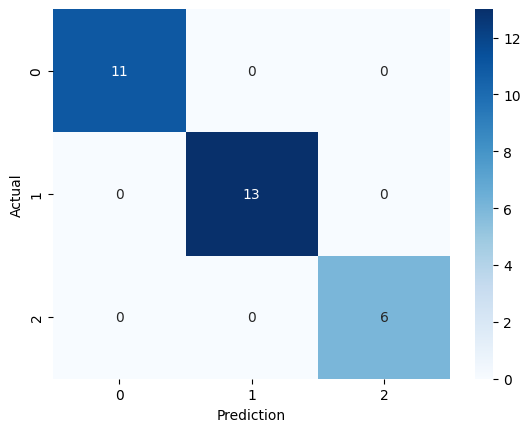

In [97]:
print_cfm(y_test, y_pred)

In [100]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 정확도를 제외하고는 모두 기본으로 이진법일 때라고 가정하기에 다중분류로 바꿔줘야 한다. => macro 사용
def print_matrics(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  re = recall_score(y_test, y_pred, average='macro')
  pr = precision_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

  print('정확도:', acc)
  print('재현율:', np.around(re, 4))
  print('정밀도:', np.around(pr, 4))
  print('f1:', np.around(f1, 4))

In [101]:
print_matrics(y_test, y_pred)

정확도: 1.0
재현율: 1.0
정밀도: 1.0
f1: 1.0


### 4. 튜닝
- k 값을 3으로 학습 및 평가

In [102]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
y_pred = clf.predict(x_test_s)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

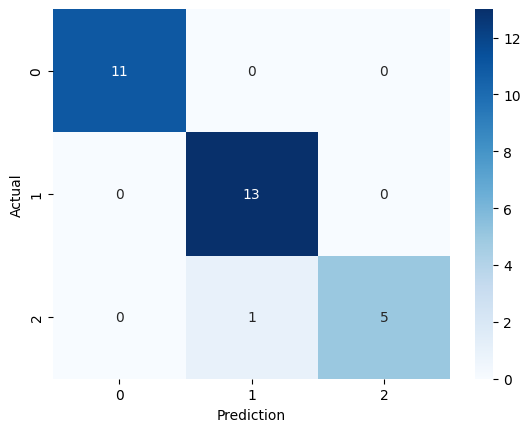

In [104]:
print_cfm(y_test, y_pred)

In [105]:
print_matrics(y_test, y_pred)

정확도: 0.9666666666666667
재현율: 0.9444
정밀도: 0.9762
f1: 0.9574
